In [0]:
from IPython.display import Latex

# Statistical Power and Power Analysis

## Statistical Power

The classical definition of statistical power is : 

"*Statistical power of a hypothesis test is the probability of correctly rejecting null hypothesis, provided the null hypothesis is false.*"

In other words,
"*Statistical power of a hypothesis test is the probability of not committing type 2 errors.*"

To understand what this means, you first need to understand what is hypothesis testing and what is a null hypothesis.

#### Hypothesis Testing
A hypothesis is an educated guess about something in the world around you. It should be testable, either by experiment or observation.

Hypothesis testing in statistics is a way for you to test the results of a survey or experiment to see if you have meaningful results. You’re basically testing whether your results are valid by figuring out the odds that your results have happened by chance. If your results may have happened by chance, the experiment won’t be repeatable and so has little use. 

#### Null Hypothesis
The null hypothesis, denoted by H0 is an alternative to the alternate hypothesis, denoted by H1.
A statistical researcher conducts hypothesis testing to reject the null hypothesis and prove that the alternate hypothesis is true instead.

Now that you know what is hypothesis testing and null hypothesis, it's easy to understand type 2 errors.
In any hypothesis test we can get 4 kinds of results : 
* If the null hypothesis is false and the statistical test leads us to reject it, you’ve made a correct decision.
* If the null hypothesis is true and you don’t reject it, again you’ve made a correct decision. 
* If the null hypothesis is true but you reject it, you’ve committed a Type I error.
* If the null hypothesis is false and you fail to reject it, you’ve committed a Type II error.
![type-1-and-2-errors.jpg](attachment:type-1-and-2-errors.jpg)
For calculating statistical power, you only have to be concerned with the type 2 errors, which is not rejecting the null hypothesis(H0) when it's false.

The higher the statistical power for a given experiment, the lower the probability of making a Type II (false negative) error.
In fact, the power is precisely the inverse of the probability of a Type II error.

                                           Power = 1 - Probability(Type 2 Error)
It can also be understood as the probability of accepting an alternative hypothesis (H1), when the alternative hypothesis is true.

When interpreting statistical power, we seek experiential setups that have high statistical power.

* Low Statistical Power: Large risk of committing Type II errors
* High Statistical Power: Small risk of committing Type II errors.

Usually most statistical experiments are expected to have a statistical power of 80% or 0.8, which means there is only a 20% chance that we will commit type 2 errors.

But another question comes up after this. How do we calculate the power of a hypothesis test?

## Power Analysis

The aim of power analysis is to find an appropriate sample size for a given experiment.

Power is closely related to 3 other parameters : 
1. Sample size
2. Effect size
3. Significance level

All these 3 terms are elaborated below in detail:

#### Sample Size:
A sample size is the number of observations in our hypothesis test.

#### Effect Size:
Effect size is the magnitude of the effect under the alternate hypothesis. Mathematically there are many ways to calculate the effect size, Pearson’s correlation coeﬃcient for the relationship between variables or Cohen’s d for the diﬀerence between groups. Here we will use the Cohen's d method of calculation.

The null hypothesis in case of Cohen's d test is that the means of both distributions/groups are equal.

Consider two separate distributions with mean m1 and m2, and variance s1 and s2. According to Cohen's d method, the effect size for power analysis will be :

$$ es = (m1 - m2) / \sqrt{(s1^2 + s2^2)/2}$$

We usually prefer a large effect size, because a larger effect size means that the means of distributions are more different (when performing Cohen's d calculation) or that there is a strong correlation between 2 variables (when performing Pearson's test). In case of Cohen's d test, an effect size of 0.8 or larger is preferred.

#### Significance level:
Siginificance level is denoted by alpha. Every hypothesis test's result is interpreted through a value called the p-value. p-value is the probability of obtaining a result equal to or more extreme than was observed in the data.
In simpler terms, the [P Value](https://www.machinelearningplus.com/statistics/p-value/) is the probability of seeing the effect(E) when the null hypothesis is true.

The value of p-value ranges from 0 to 1. In interpreting the p-value of a signiﬁcance test, you must specify the signiﬁcance level alpha (α). A common value for the signiﬁcance level is 5%, or 0.05. The p-value is understood in the context of the chosen signiﬁcance level. A result of a signiﬁcance test is claimed to be statistically signiﬁcant if the p-value is less than the signiﬁcance level. This means that the null hypothesis is rejected. 

* p-value < 0.05 -- reject the null hypothesis
* p-value > 0.05 -- can't reject null hypothesis.

Basically, the significance level is a boundary that defines the threshold for acceptance of our alternate hypothesis and rejection of null hypothesis.

The four measurements,  Power, Effect size, Significance level and Sample size are very closely related. When 3 of these are known, the fourth one can be easily calculated.

![introduction-to-power-analysis-9-638.jpg](attachment:introduction-to-power-analysis-9-638.jpg)
                                 
beta here is the probability of type 2 errors

The aim of power analysis is to find an appropriate sample size when given required power, effect size and significance level. Power analysis can be done on python using the `statsmodel` library functions.
For the same, you will have to decide the values of power, effect size and significance level.
We will assume the typically taken values. 
* significance level = 0.05
* effect size = 0.8 
* power = 0.8

The example we are considering a Students t test with two different distributions. The null hypothesis in this case is that the means of both distributions is equal.
To calculate power we will use the `TTestIndPower()` class from `statsmodel` library for calculating a power analysis for the Student’s t-test with independent samples.

In [0]:
# estimate sample size via power analysis 
from statsmodels.stats.power import TTestIndPower 
# parameters for power analysis 
effect = 0.8 
alpha = 0.05 
power = 0.8 
# perform power analysis 
analysis = TTestIndPower() 
# As we want to find the number of observations, we set nobs1 to None
result = analysis.solve_power(effect, power=power, nobs1=None, alpha=alpha) 
print('Sample Size: %.3f' % result)

Sample Size: 25.525


Thus, we need a sample size of 25 to observe a power of 80%, effect size of 0.8 at significance level 5%.

We can also plot power curves, that will give us a visual idea of how different effect sizes and sample sizes will affect the power.

This can be done by using the `plot_power()` function. The dependent variable (x-axis) must be speciﬁed by name in the `dep_var` argument. Arrays of values can then be speciﬁed for the sample size (nobs), eﬀect size (effect size), and signiﬁcance (alpha) parameters. One or multiple curves will then be plotted showing the impact on statistical power.

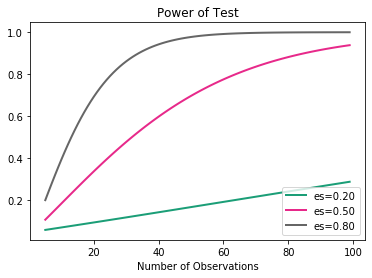

In [0]:
# calculate power curves for varying sample and effect size 
from numpy import array 
from matplotlib import pyplot 
from statsmodels.stats.power import TTestIndPower 
# parameters for power analysis 
effect_sizes = array([0.2, 0.5, 0.8]) 
sample_sizes = array(range(5, 100)) # We create an array of values for no. of variables from 5 to 100 
# calculate power curves from multiple power analyses 
analysis = TTestIndPower() 
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes) 
pyplot.show();

Here you can observe how sample sizes affect the power of statistical test at different effect sizes.

##### **References**
Statistical Methods for Machine Learning by Jason Brownlee 